In [1]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [3]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ddpg, TBP, zs_ddpg, models, zs_models')

from Zero_Sum_DDPG import setup_logger_kwargs, MLPActorCritic, DG_DDPG
from DDPG import DDPG
import TBP
from TBP import ThreeBodyEnv

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Zero_Sum_DDPG.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cuda.pth already exists.
model/q_cuda.pth already exists.
Directory 'model_zs' already exists and is not empty.
model_zs/actor_cuda.pth already exists.
model_zs/q_cuda.pth already exists.
model_zs/q_2_cuda.pth already exists.
model_zs/actor_2_cuda.pth already exists.
trajectory.csv already exists.
Directory 'utils' already exists.
Directory 'model' already exists and is not empty.
File model/actor_cuda.pth already exists; skipping download.


In [4]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [5]:
# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/partial_observation/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/partial_observation/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<Zero_Sum_DDPG.DG_DDPG

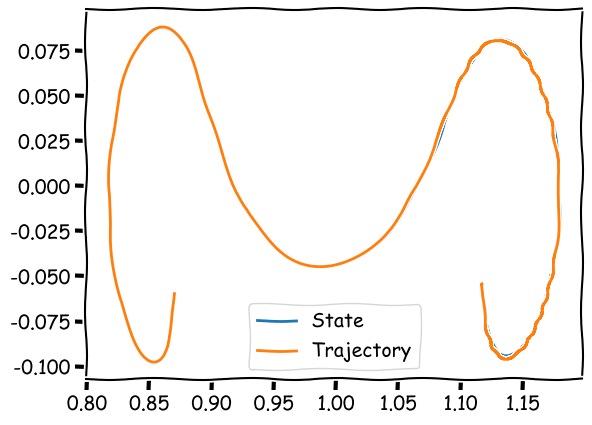

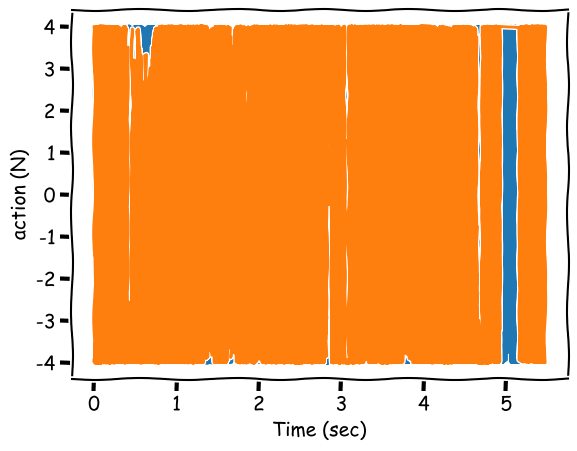

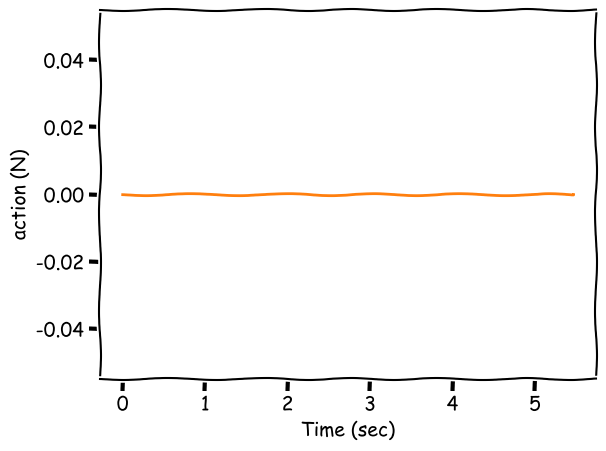

In [6]:
ddpg_zs = DG_DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000,
    first_player_epoch=50
)

ddpg_zs.load(filepath='model_zs/', from_device_to_load='cuda')
ddpg_zs.test(fun_mode=True)
ddpg_zs.env.second_player = False

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/partial_observation/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/partial_observation/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x1662067d0>":	{
            

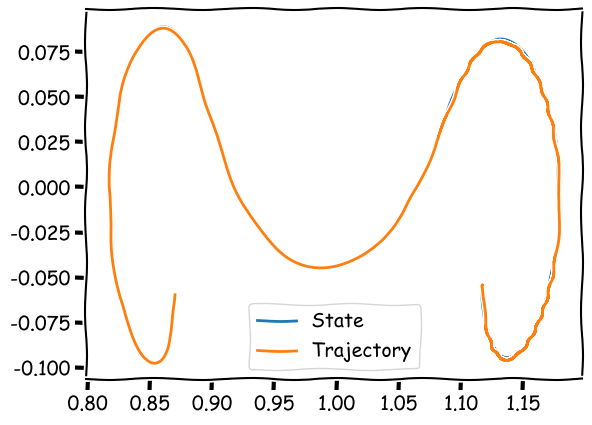

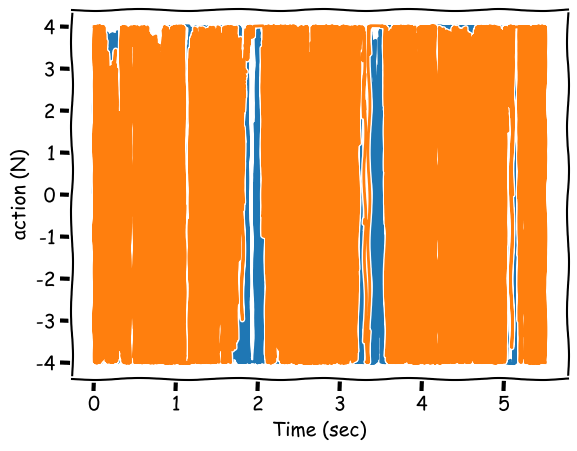

In [7]:
ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

In [8]:
class PartialObservationWrapper(gym.Wrapper):
    """
    Gym environment wrapper that simulates partial observations (sensor loss) by masking parts of the state.
    This wrapper supports the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, observation_mask_ratio=0.5):
        """
        Initializes the PartialObservationWrapper with a given masking ratio.
        - observation_mask_ratio: The percentage of state variables to mask (0 - 1).
        """
        super(PartialObservationWrapper, self).__init__(env)
        self.observation_mask_ratio = observation_mask_ratio  # Fraction of the state to mask (0-1)

    def reset(self, **kwargs):
        """
        Perturbs the observation by masking parts of it to simulate sensor loss.
        """
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
        else:
            obs = result

        # Apply partial observation (sensor loss)
        obs = self._apply_sensor_loss(obs)

        return obs, info if isinstance(result, tuple) else obs

    def step(self, action):
        """
        Simulates sensor loss by modifying the observation returned from the environment.
        """
        obs, reward, terminated, truncated, info = self.env.step(action)

        # Apply partial observation (sensor loss)
        obs = self._apply_sensor_loss(obs)

        return obs, reward, terminated, truncated, info

    def _apply_sensor_loss(self, observation):
        """
        Masks parts of the observation to simulate sensor loss.
        """
        observation = np.array(observation)

        # Create a mask for the observation. Randomly set the observation components to zero.
        mask = np.random.rand(*observation.shape) > self.observation_mask_ratio
        observation[mask] = 0  # Set the masked elements to zero to simulate missing data

        return observation


def make_env_partial_observation(error_range=0.01, final_range=0.001, observation_mask_ratio=0.5):
    """
    Creates the ThreeBodyEnv wrapped with partial observation (sensor loss).
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return PartialObservationWrapper(env, observation_mask_ratio=observation_mask_ratio)


In [9]:
def run_episode(agent, env_fn, max_steps=10000):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Returns:
        total_reward, avg_error_per_step, num_of_fails, avg_action_magnitude_per_step
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    total_error = 0.0
    num_of_fails = 0
    total_actions = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        action = agent.get_action(obs, 0)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        steps += 1
        # match other notebooks’ metrics
        total_error = np.dot(obs[0:2], obs[0:2])**0.5
        total_actions += np.dot(action, action)**0.5
        if done and reward < 0:
            num_of_fails += 1

    env.close()
    return total_reward, total_error/steps, num_of_fails, total_actions/steps


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards, errors, fails, and actions.
    """
    returns = []
    errors = []
    fails = []
    actions = []
    for i in range(num_episodes):
        ret, error, fail, action = run_episode(agent, env_fn, max_steps)
        returns.append(ret)
        errors.append(error)
        fails.append(fail)
        actions.append(action)
        print(f"{i} of {num_episodes}")
    return returns, errors, fails, actions


done 🥺
second player was in the game
0 of 10
done 🥺
second player was in the game
1 of 10
[0.00072724 0.00997633 0.00178383 0.01338366]
idx 0.09998 state 0.016803586358087635
too much error 🥲😱
second player was in the game
2 of 10
[0.0008323  0.01005026 0.00254152 0.01358735]
idx 0.09998 state 0.017110692250569434
too much error 🥲😱
second player was in the game
3 of 10
[0.00113085 0.00999906 0.00199848 0.01191034]
idx 0.09998 state 0.015719737555300508
too much error 🥲😱
second player was in the game
4 of 10
[0.00088462 0.01005988 0.00156147 0.01229856]
idx 0.09998 state 0.01598988910569889
too much error 🥲😱
second player was in the game
5 of 10
[0.00073083 0.0100271  0.00237739 0.01334547]
idx 0.09998 state 0.01687692006107939
too much error 🥲😱
second player was in the game
6 of 10
[0.00095724 0.00998042 0.00202793 0.0123992 ]
idx 0.09998 state 0.016074133951021065
too much error 🥲😱
second player was in the game
7 of 10
[0.00072894 0.01002366 0.00208483 0.01390605]
idx 0.09998 state 0.

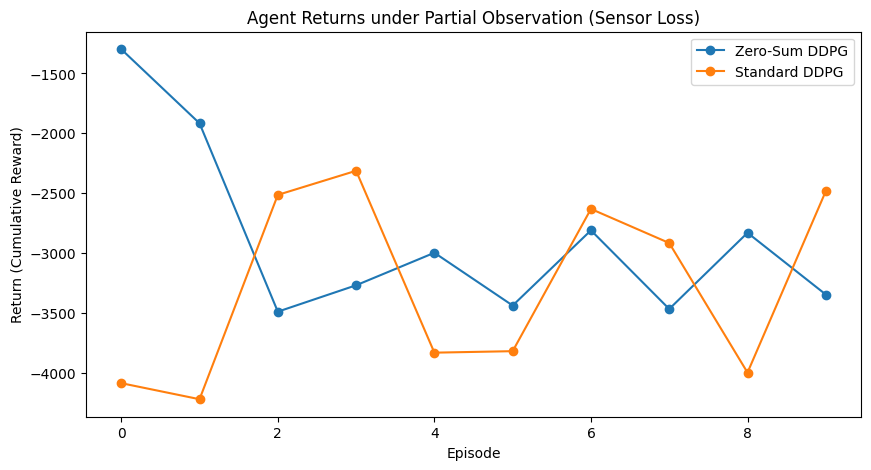

Zero-Sum DDPG with Partial Observation Average Error: 0.0007502660706425411
Standard DDPG with Partial Observation Average Error: 0.0006816727906416775


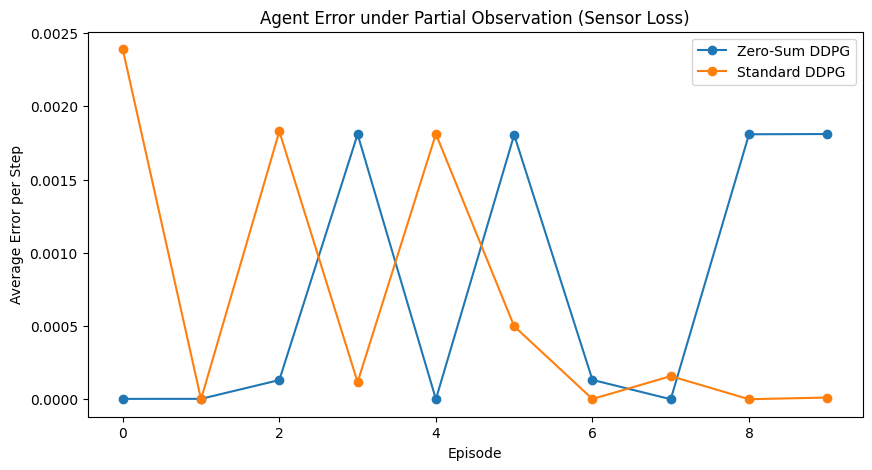

Zero-Sum DDPG with Partial Observation Average Action Magnitude: 5.568703845610751
Standard DDPG with Partial Observation Average Action Magnitude: 5.565477301043804


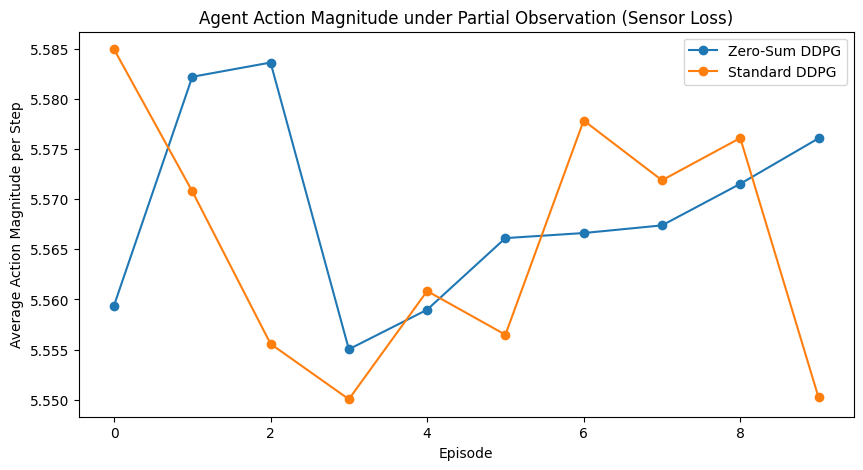

Zero-Sum DDPG with Partial Observation Average Number of Fails per Episode: 0.8
Standard DDPG with Partial Observation Average Number of Fails per Episode: 0.6


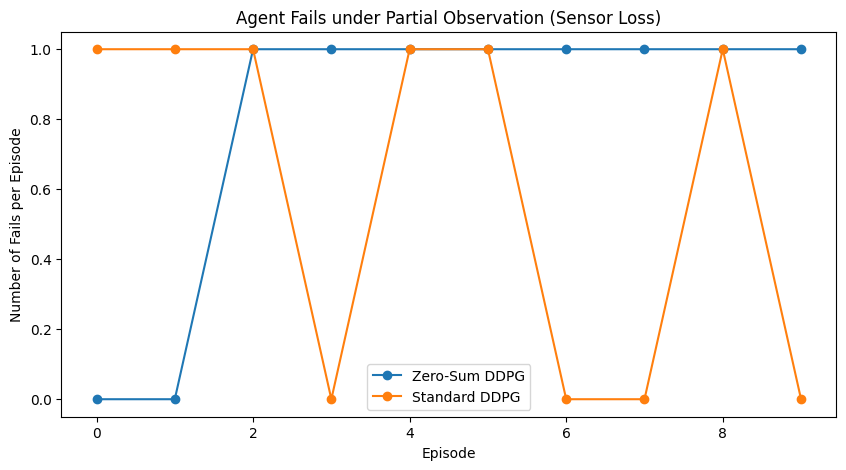

Normalized Zero-Sum DDPG with Partial Observation Average Return: -2.887195783219044
Normalized Standard DDPG with Partial Observation Average Return: -3.2825912033928897
Normalized Zero-Sum DDPG with Partial Observation Average Error: 0.750266070642541
Normalized Standard DDPG with Partial Observation Average Error: 0.6816727906416775
Normalized Zero-Sum DDPG with Partial Observation Average Action Magnitude: 5.568703845610751
Normalized Standard DDPG with Partial Observation Average Action Magnitude: 5.565477301043804
Normalized Zero-Sum DDPG with Partial Observation Average Number of Fails per Episode: 0.08
Normalized Standard DDPG with Partial Observation Average Number of Fails per Episode: 0.06
[[-1297.7175638149151, -1916.7411535582983, -3490.78623207812, -3270.1512735069305, -2998.4579429317387, -3439.453353996592, -2811.089666589145, -3468.395173677241, -2831.662176168201, -3347.5032958692555], [-4088.167132290798, -4222.33407436667, -2514.8710393729743, -2313.446754609981, -3

/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_17779/307432557.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


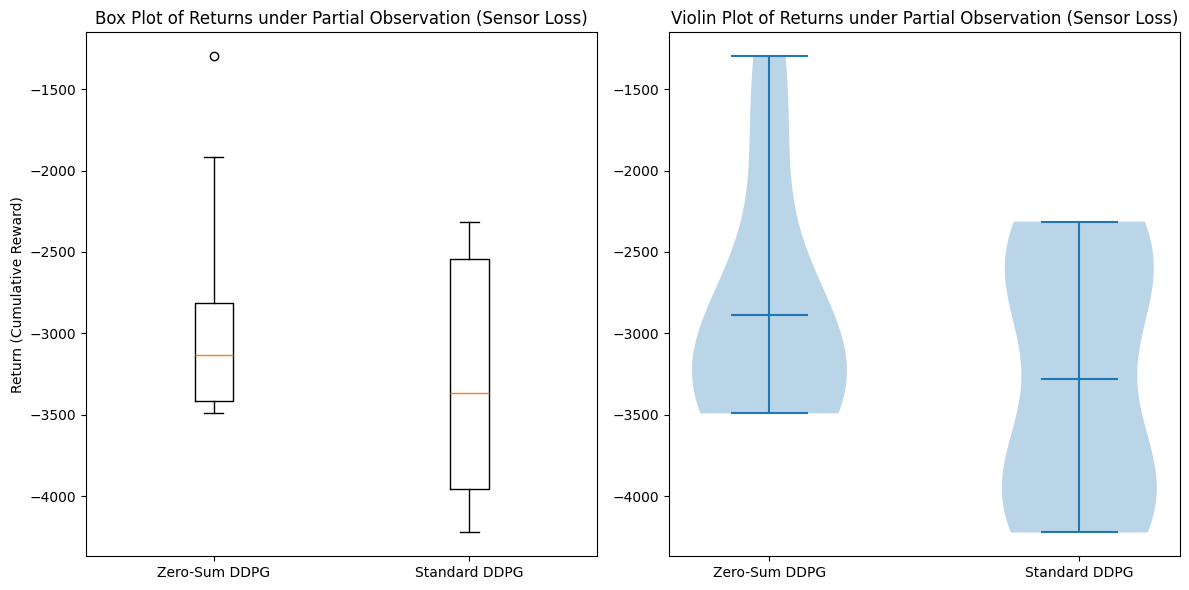

In [10]:

# Number of episodes for evaluation
num_episodes = 10

# Update the agents' environment function to use partial observation (sensor loss)
ddpg_zs.env_fn = lambda: make_env_partial_observation(observation_mask_ratio=0.5)
ddpg.env_fn = lambda: make_env_partial_observation(observation_mask_ratio=0.5)

# Evaluate Zero-Sum DDPG and Standard DDPG agents with partial observation (sensor loss)
returns_zs_partial_observation, total_error_zs, num_of_fails_zs, total_actions_zs \
    = evaluate_agent(ddpg_zs, ddpg_zs.env_fn, num_episodes=num_episodes)
returns_std_partial_observation, total_error_std, num_of_fails_std, total_actions_std \
    = evaluate_agent(ddpg, ddpg.env_fn, num_episodes=num_episodes)

# Calculate and print average returns
avg_return_zs_partial_observation = np.mean(returns_zs_partial_observation)
avg_return_std_partial_observation = np.mean(returns_std_partial_observation)

print("Zero-Sum DDPG with Partial Observation Average Return:", avg_return_zs_partial_observation)
print("Standard DDPG with Partial Observation Average Return:", avg_return_std_partial_observation)

# Plot the returns for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(returns_zs_partial_observation, marker='o', label='Zero-Sum DDPG')
plt.plot(returns_std_partial_observation, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title('Agent Returns under Partial Observation (Sensor Loss)')
plt.legend()
plt.show()

# Additional metrics: average error, action magnitude, and fails
avg_total_error_zs = np.mean(total_error_zs)
avg_total_error_std = np.mean(total_error_std)
print("Zero-Sum DDPG with Partial Observation Average Error:", avg_total_error_zs)
print("Standard DDPG with Partial Observation Average Error:", avg_total_error_std)

plt.figure(figsize=(10, 5))
plt.plot(total_error_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(total_error_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Average Error per Step')
plt.title('Agent Error under Partial Observation (Sensor Loss)')
plt.legend()
plt.show()

avg_total_actions_zs = np.mean(total_actions_zs)
avg_total_actions_std = np.mean(total_actions_std)
print("Zero-Sum DDPG with Partial Observation Average Action Magnitude:", avg_total_actions_zs)
print("Standard DDPG with Partial Observation Average Action Magnitude:", avg_total_actions_std)

plt.figure(figsize=(10, 5))
plt.plot(total_actions_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(total_actions_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Average Action Magnitude per Step')
plt.title('Agent Action Magnitude under Partial Observation (Sensor Loss)')
plt.legend()
plt.show()

avg_num_of_fails_zs = np.mean(num_of_fails_zs)
avg_num_of_fails_std = np.mean(num_of_fails_std)
print("Zero-Sum DDPG with Partial Observation Average Number of Fails per Episode:", avg_num_of_fails_zs)
print("Standard DDPG with Partial Observation Average Number of Fails per Episode:", avg_num_of_fails_std)

plt.figure(figsize=(10, 5))
plt.plot(num_of_fails_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(num_of_fails_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Number of Fails per Episode')
plt.title('Agent Fails under Partial Observation (Sensor Loss)')
plt.legend()
plt.show()

# Normalized evaluation results
print("Normalized Zero-Sum DDPG with Partial Observation Average Return:", avg_return_zs_partial_observation/1000)
print("Normalized Standard DDPG with Partial Observation Average Return:", avg_return_std_partial_observation/1000)
print("Normalized Zero-Sum DDPG with Partial Observation Average Error:", avg_total_error_zs*1000)
print("Normalized Standard DDPG with Partial Observation Average Error:", avg_total_error_std*1000)
print("Normalized Zero-Sum DDPG with Partial Observation Average Action Magnitude:", avg_total_actions_zs)
print("Normalized Standard DDPG with Partial Observation Average Action Magnitude:", avg_total_actions_std)
print("Normalized Zero-Sum DDPG with Partial Observation Average Number of Fails per Episode:", avg_num_of_fails_zs/10)
print("Normalized Standard DDPG with Partial Observation Average Number of Fails per Episode:", avg_num_of_fails_std/10)

# Box and Violin plots (keep as before but with correct title context)
data = [returns_zs_partial_observation, returns_std_partial_observation]
print(data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Partial Observation (Sensor Loss)')
plt.ylabel('Return (Cumulative Reward)')

plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Partial Observation (Sensor Loss)')

plt.tight_layout()
plt.show()

df  = pd.DataFrame(np.array(data).T, columns=['Zero-Sum DDPG', 'Standard DDPG'])
df.head()
df.to_csv('evaluation_returns.csv', index=False)


In [11]:
# print for latex table
print(f"""${avg_return_std_partial_observation/1000:.2f}$ & ${avg_return_zs_partial_observation/1000:.2f}$ & ${avg_total_error_std*1000:.2f}$ & ${avg_total_error_zs*1000:.2f}$ & ${avg_total_actions_zs:.2f}$ & ${avg_total_actions_zs:.2f}$ & ${avg_num_of_fails_std:.2f}$ & ${avg_num_of_fails_zs:.2f}$
""")

$-3.28$ & $-2.89$ & $0.68$ & $0.75$ & $5.57$ & $5.57$ & $0.60$ & $0.80$

